<a href="https://colab.research.google.com/github/gundaminpde/2023-spring/blob/main/02_1_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Built-in data set인 iris_dataset 사용하기**

In [ ]:
from sklearn.datasets import load_iris    ## sklearn.dataset 안에는 빌트인 (built-in) 데이터 셋
iris_dataset = load_iris()

type(iris_dataset)

sklearn.utils._bunch.Bunch

In [ ]:
len(iris_dataset)

8

In [ ]:
print("iris_dataset의 키:\n", iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(iris_dataset['DESCR'][:193] + "\n...")  ## DESCR 대략적인 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [ ]:
print("타깃의 이름:", iris_dataset['target_names'])

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [ ]:
print("특성의 이름:\n", iris_dataset['feature_names'])

특성의 이름:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print("data의 타입:", type(iris_dataset['data']))

data의 타입: <class 'numpy.ndarray'>


In [ ]:
print("data의 크기:", iris_dataset['data'].shape)

data의 크기: (150, 4)


In [ ]:
print("data의 처음 다섯 행:\n", iris_dataset['data'][:5])

data의 처음 다섯 행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [ ]:
print("타깃:\n", iris_dataset['target'])

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# **2. 다른 곳에서 iris_dataset 불러와 사용하기**

In [ ]:
import pandas as pd

Url_iris="https://raw.githubusercontent.com/gundaminpde/2022/main/iris.csv"


# 아이리스 데이터를 불러옵니다.
df = pd.read_csv(Url_iris)

In [ ]:
## 어떻게 생겼는지 확인해 본다.

df.head()

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.tail()

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


In [ ]:
df.shape

(150, 6)

In [ ]:
## 분류할 종류가 몇개인가 ?

df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
## 

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:5], df.loc[:,'Species'], random_state=0)

In [ ]:
X_train.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [ ]:
y_test.head()

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: Species, dtype: object

In [ ]:
type(y_test)

pandas.core.series.Series

# **3. 가장 먼저 할 일: 데이터 살펴보기**

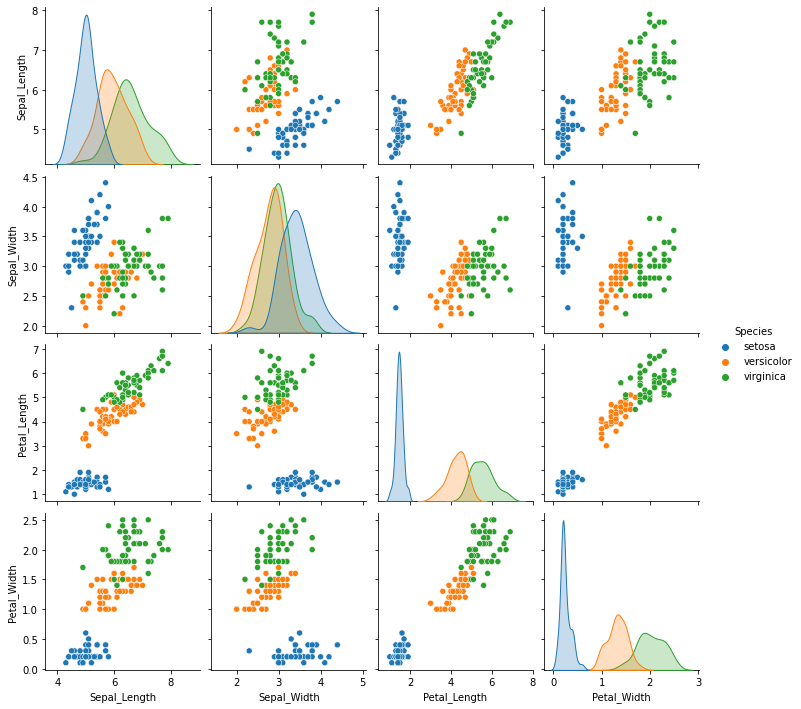

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프로 확인해 봅시다.
sns.pairplot(df.iloc[:,1:6], hue='Species'); ## 사실 seaborn 없이 pd.plotting.scatter_matrix로도 할 수 있다.
plt.show()



In [ ]:
### 사실 train_dataset으로만 하는 것이 원칙입니다. 그래서 다시 해 보았습니다.


df_cat = pd.concat([X_train,y_train], axis=1)

df_cat.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
61,5.9,3.0,4.2,1.5,versicolor
92,5.8,2.6,4.0,1.2,versicolor
112,6.8,3.0,5.5,2.1,virginica
2,4.7,3.2,1.3,0.2,setosa
141,6.9,3.1,5.1,2.3,virginica


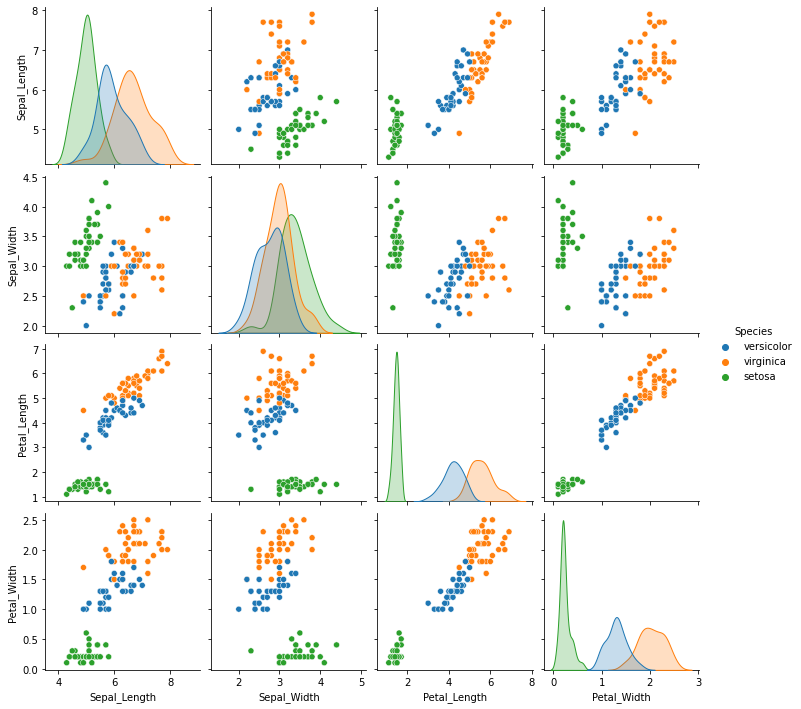

In [ ]:
# 그래프로 확인해 봅시다.
sns.pairplot(df_cat, hue='Species'); 
plt.show()

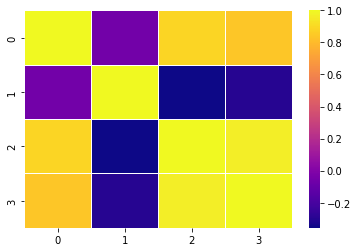

In [ ]:
import numpy as np

corr_mat=np.corrcoef(X_train,rowvar=False)

sns.heatmap(corr_mat,linewidth=1,cmap='plasma')
plt.show()

In [ ]:
df_cat.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,112.000000,112.000000,112.000000,112.000000
mean,5.886607,3.051786,3.796429,1.223214
std,0.871314,0.436196,1.800697,0.781427
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

# **Distplot**

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2103

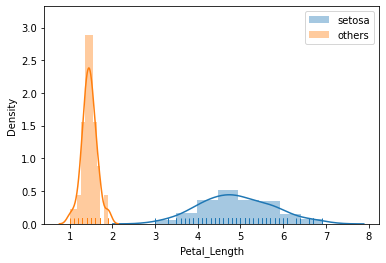

In [ ]:
sns.distplot(df[df.Species != "setosa"]["Petal_Length"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.Species == "setosa"]["Petal_Length"], hist=True, rug=True, label="others")
plt.legend()
plt.show()

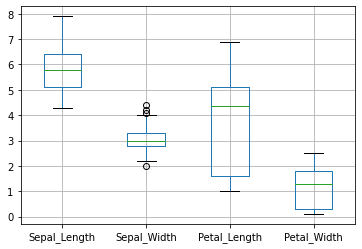

In [ ]:
df.iloc[:,1:5].boxplot()
plt.show()

# **4. kNN 실행.... 엄청 짧다.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

#5. **이제 새로운 data로 예측도 할 수 있다.**

In [ ]:
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)


X_new.shape: (1, 4)


In [ ]:
prediction = knn.predict(X_new)
print("예측:", prediction)

예측: ['setosa']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pred)

테스트 세트에 대한 예측값:
 ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


In [ ]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [ ]:
knn.score(X_test, y_test)

0.9736842105263158

In [ ]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


In [ ]:
knn.score(X_test, y_test)

0.9736842105263158

참고: 

회귀의 경우 score는 $R^2 = 1 - \frac {\sum (target - estimate)^2} { \sum (target - mean)^2}$ 이다.

# **6. Grid Search**

In [ ]:
# grid search
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

gs = GridSearchCV(knn, grid_params, cv=10)
gs.fit(X_train, y_train)

print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}
Best Score :  0.9727272727272727
Best Test Score :  0.9736842105263158


In [ ]:
knn_best = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 12, weights = 'uniform')
knn_best.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=12)

In [ ]:
print('*** Test Accuracy *** \n   {}'.format(knn_best.score(X_test, y_test)))
##print('\n*** Confusion Matrix *** \n', confusion_matrix(y_test, knn_best.predict(X_test)))

*** Test Accuracy *** 
   0.9736842105263158


# **전처리 추가: 현재 작업 중**

In [ ]:

# 데이터 전처리(표준화, Standardization)

from sklearn.preprocessing import StandardScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1]]

scaler = StandardScaler()

scaler.fit(data)

print('결과1',scaler.mean_) ## mean_ 에 _가 있다.

print('결과2', scaler.transform(data))

print('결과3',scaler.transform([[2, 2]]))

결과1 [0.5 0.5]
결과2 [[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
결과3 [[3. 3.]]


In [ ]:
## 앞의 붓꽃 data를 변환하자.
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 참고하세요.

std = StandardScaler()
std2 = StandardScaler()


std.fit(X_train)
X_train_std = std.transform(X_train)
print('각각 평균', std.mean_)
print('각각 분산', std.var_)

X_test_std = std.transform(X_test)

type(X_train_std)

각각 평균 [5.88660714 3.05178571 3.79642857 1.22321429]
각각 분산 [0.75240992 0.18856824 3.21355867 0.60517538]


numpy.ndarray

In [ ]:

new_X_train = pd.DataFrame(X_train_std)

df_cat_std = pd.concat([new_X_train,y_train], axis=1)

df_cat_std.head()

,0,1,2,3,Species
0,0.015440,-0.119255,0.225127,0.355798,setosa
1,-0.099845,-1.040395,0.113560,-0.029841,setosa
2,1.053005,-0.119255,0.950314,1.127075,setosa
3,-1.367980,0.341315,-1.392599,-1.315303,setosa
4,1.168290,0.111030,0.727180,1.384168,setosa


In [160]:
y_train.head()

61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
Name: Species, dtype: object

In [162]:
y_train2=np.asarray(y_train)
y_train=pd.DataFrame(y_train2)

In [163]:

df_cat_std = pd.concat([new_X_train,y_train], axis=1)

df_cat_std.head()

,0,1,2,3,0
0,0.015440,-0.119255,0.225127,0.355798,versicolor
1,-0.099845,-1.040395,0.113560,-0.029841,versicolor
2,1.053005,-0.119255,0.950314,1.127075,virginica
3,-1.367980,0.341315,-1.392599,-1.315303,setosa
4,1.168290,0.111030,0.727180,1.384168,virginica


In [164]:
df_cat_std.tail()

,0,1,2,3,0
107,-1.137410,0.111030,-1.281032,-1.443850,setosa
108,0.476580,-0.349540,1.006098,0.741436,virginica
109,-0.099845,-0.810110,0.169343,-0.286934,versicolor
110,2.090570,1.723026,1.619718,1.255621,virginica
111,-1.483265,0.341315,-1.336815,-1.315303,setosa


In [167]:
df_cat_std.columns = ['0','1','2','3','Species'] 

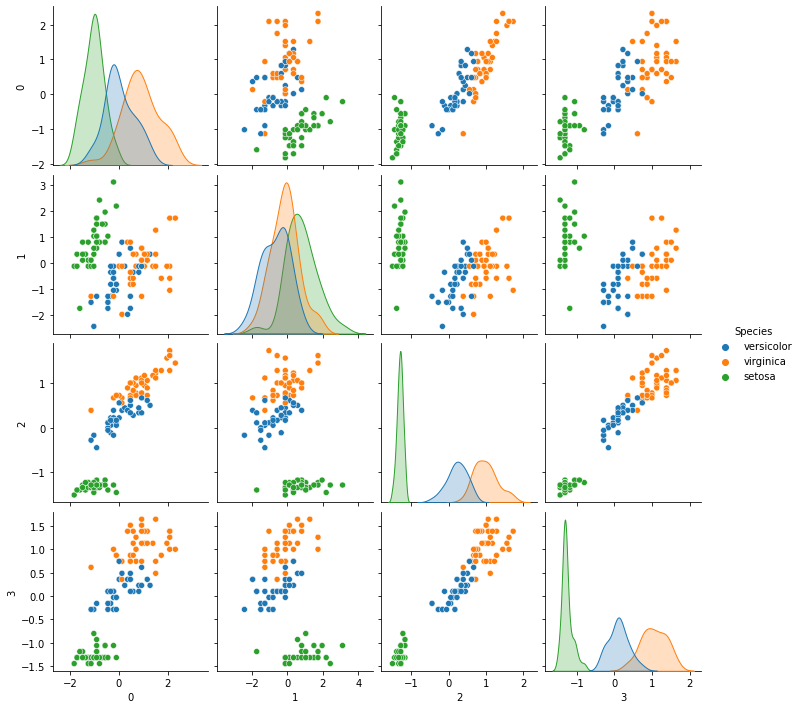

In [168]:
# 그래프로 확인해 봅시다.
sns.pairplot(df_cat_std, hue='Species'); 
plt.show()